In [3]:
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes
from sklearn import preprocessing

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10,6))
plt.rc('font', **font)
np.set_printoptions(precision=4, suppress=True)



In [4]:
case_namelist = ['pfclm1_base1','pfclm1_base40',
                 'pfclm2_base1','pfclm2_base40']

# Reading the data

In [5]:
# load sub-surface storage
sfpath = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/subsurfacestorage_cal'
outputfile_soilname = 'pfclm_soil_storage.csv'
outputfile_saproname = 'pfclm_sapro_storage.csv'


df_soil = pd.read_csv('%s/%s' %(sfpath,outputfile_soilname),names=case_namelist)
max_soil=pd.DataFrame(df_soil.max(),
                  index=np.arange(0, 168, 1))

df_sapro = pd.read_csv('%s/%s' %(sfpath,outputfile_saproname),names=case_namelist)
max_sapro=pd.DataFrame(df_sapro.max(),
                  index=np.arange(0, 168, 1))

# load precipitation, in unit of mm/s
clm_input_path= '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/clm_input'
clm_input='narr_1hr_new.txt'
file = np.loadtxt('%s/%s' %(clm_input_path,clm_input)) 
precip_mms=file[:,2] 

# load surface storage, in unit of cubic meters
Datum_SS= pd.DataFrame(index=np.arange(0, 168, 1), columns=case_namelist)

sfpath = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/surfacestorage_cal'
outputfile_surface_11= 'surface_storage_depth_pfclm1_base1.csv'
df_ss_11 = pd.read_csv('%s/%s' %(sfpath,outputfile_surface_11))

outputfile_surface_140= 'surface_storage_depth_pfclm1_base40.csv'
df_ss_140 = pd.read_csv('%s/%s' %(sfpath,outputfile_surface_140))

outputfile_surface_21= 'surface_storage_depth_pfclm2_base1.csv'
df_ss_21 = pd.read_csv('%s/%s' %(sfpath,outputfile_surface_21))

outputfile_surface_240= 'surface_storage_depth_pfclm2_base40.csv'
df_ss_240 = pd.read_csv('%s/%s' %(sfpath,outputfile_surface_240))

Datum_SS['pfclm1_base1']=(df_ss_11.iloc[:,1])
Datum_SS['pfclm1_base40']=(df_ss_140.iloc[:,1])
Datum_SS['pfclm2_base1']=(df_ss_21.iloc[:,1])
Datum_SS['pfclm2_base40']=(df_ss_240.iloc[:,1])

# Functions (remove the outliers)

In [6]:
# # funtion of removing the outliers, actually just wanna remove those with extream values
# def remove_outlier(df_in):
#     q1 = df_in.quantile(0.008)
#     q3 = df_in.quantile(0.992)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in[(df_in > fence_low) & (df_in < fence_high)]
#     return df_out

In [7]:
# function of smooth the data, removin thing peaks and abrupt changes
def series_smooth(df_in):
    temp_result=df_in.copy()
    for i in range(len(df_in)):
        if i==0 or i==699:
            temp_result[i]=df_in[i]
        else:
            if (temp_result[i-1]-df_in[i])/temp_result[i-1]>0.1 or (temp_result[i-1]-df_in[i])/temp_result[i-1]<-0.1:
                temp_result[i]= (temp_result[i-1]+df_in[i+1])/2  
            else:
                temp_result[i]=df_in[i]
    return temp_result


# Computation, applying functions

### Computation, clean the data apply the functions (note: array may work better, for let it be for now)

In [8]:
# df_soil_smooth=pd.DataFrame(np.random.randint(low=0, high=10, size=(700, 10)),columns=case_namelist)
df_soil_final=pd.DataFrame(np.random.randint(low=0, high=10, size=(168, 4)),columns=case_namelist)
df_sapro_final=pd.DataFrame(np.random.randint(low=0, high=10, size=(168, 4)),columns=case_namelist)

In [9]:
# finalze the soil storage and saprolite storage,remove the outlier by calling the function
for i in range(4):
    name_index=case_namelist[i]
#     temp= remove_outlier(df_soil[name_index])
#     df_soil_smooth[name_index]=remove_outlier(df_soil[name_index])
#     print df_soil_smooth[name_index]
#     print name_index
# remove the peaks ad absrupt changes by calling the function
    df_soil_final[name_index]=series_smooth(df_soil[name_index])
    df_sapro_final[name_index]=series_smooth(df_sapro[name_index])
    
# finalize the total subsurface water storage    
df_water_total=df_sapro_final+df_soil_final


/home/chaochen/build_apps/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


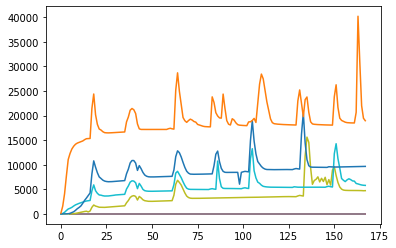

In [10]:
plt.plot(df_soil_final.iloc[[5,167],:])
plt.plot(df_sapro_final.iloc[[5,167],:])
plt.plot(Datum_SS)

## Plot

### plot, water storage between case 1 and case 40, and in soil and saprolite

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


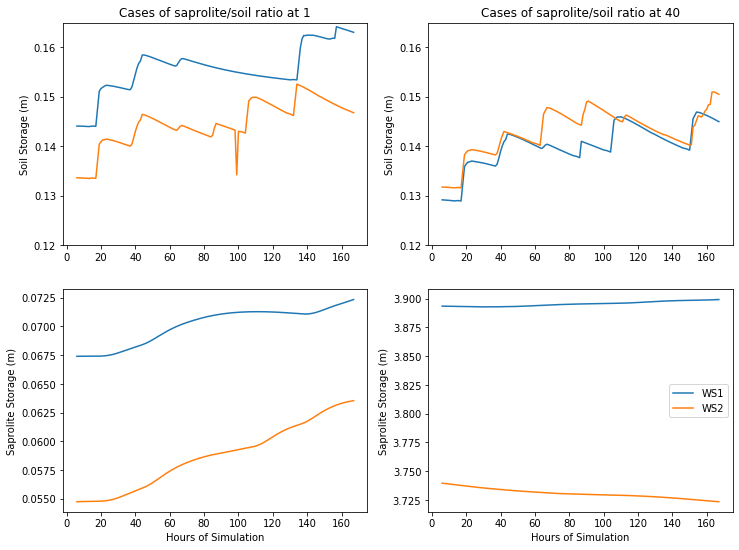

<function matplotlib.pyplot.close(fig=None)>

In [11]:
###### for component water volumn plots, volumn in soil and saprolite
fig = plt.figure(figsize=(12,9))

# plot, soil
soil_1510=fig.add_subplot(2, 2, 1)
plt.plot(df_soil_final.iloc[6:,[0,2]])

plt.ylim(0.12,0.165)
plt.ylabel("Soil Storage (m)")
soil_1510.set_title("Cases of saprolite/soil ratio at 1")

soil_2040=fig.add_subplot(2, 2, 2)
plt.plot(df_soil_final.iloc[6:,[1,3]])
plt.ylim(0.12,0.165)
# plt.xlabel("Days of Simulation")
plt.ylabel("Soil Storage (m)")
soil_2040.set_title("Cases of saprolite/soil ratio at 40")

# plot, saprolite
fig.add_subplot(2, 2, 3)
plt.plot(df_sapro_final.iloc[6:,[0,2]])
plt.ylabel("Saprolite Storage (m)")
plt.xlabel("Hours of Simulation")
fig.add_subplot(2, 2, 4)
plt.plot(df_sapro_final.iloc[6:,[1,3]])
plt.ylabel("Saprolite Storage (m)")
plt.xlabel("Hours of Simulation")
plt.legend(["WS1","WS2"])
plt.savefig('WaterContentComparisons_PFCLM.png')
plt.show()
plt.close


### plot the water storage in precipitation, surface water, soil water, and saprolite water

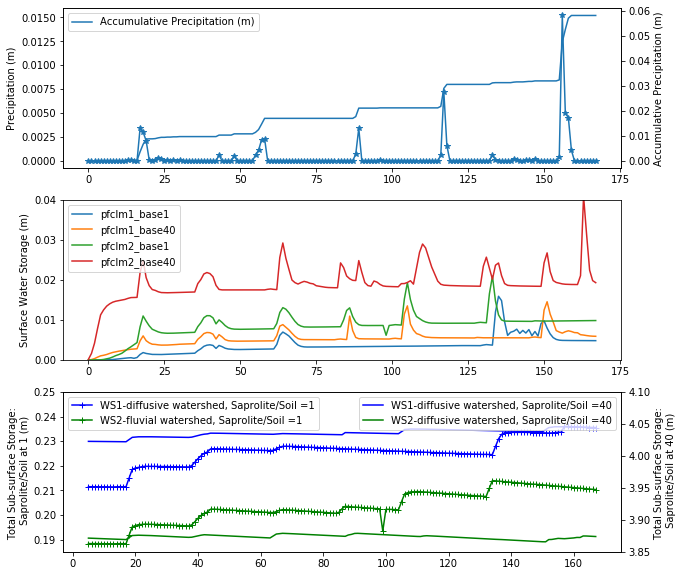

<function matplotlib.pyplot.close(fig=None)>

In [17]:
###### plot the sum of soil and sparolite water storage
## plot the precipitation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(3,1, 1)
# data conversion, from meter per second to meter per hour
precip_mmh=precip_mms*3600/1000
plt.plot(precip_mmh,'*-',label='Precipitation')
plt.ylabel("Precipitation (m)")

a1x=ax.twinx()
plt.plot(precip_mmh.cumsum() ,label='Accumulative Precipitation (m)')
plt.ylabel("Accumulative Precipitation (m)")
plt.legend(loc='upper left')


## plot the surface storage, in unit of m
cx = fig.add_subplot(3,1, 2)
# concert the unit from cubic meters into meter
Datum_SS_m=Datum_SS/(198*198*5*5)

plt.plot(Datum_SS_m.iloc[:, 0], label='pfclm1_base1')
plt.plot(Datum_SS_m.iloc[:, 1], label='pfclm1_base40')
plt.plot(Datum_SS_m.iloc[:, 2], label='pfclm2_base1')
plt.plot(Datum_SS_m.iloc[:, 3], label='pfclm2_base40')
plt.ylabel("Surface Water Storage (m)")
plt.ylim(0,0.04)
plt.legend(loc='upper left')

## plot the sub-surface storage, in unit of m
bx = fig.add_subplot(3,1, 3)
plt.plot(df_water_total.iloc[5:,0],'b+-',label='WS1-diffusive watershed, Saprolite/Soil =1')
plt.plot(df_water_total.iloc[5:,2], 'g+-',label='WS2-fluvial watershed, Saprolite/Soil =1')
plt.ylabel("Total Sub-surface Storage: \n Saprolite/Soil at 1 (m)")
plt.ylim(0.185,0.25)
plt.legend(loc='upper left')

b1x=bx.twinx()
# plot
plt.plot(df_water_total.iloc[5:,1],'b',label='WS1-diffusive watershed, Saprolite/Soil =40')
plt.plot(df_water_total.iloc[5:,3],'g',label='WS2-diffusive watershed, Saprolite/Soil =40')
plt.ylabel("Total Sub-surface Storage: \n Saprolite/Soil at 40 (m)")
plt.xlabel("Days of Simulation")
plt.ylim(3.85,4.1)
plt.legend(loc='upper right')

plt.savefig('totalWaterStorage_PFCLM.png')
plt.show()
plt.close

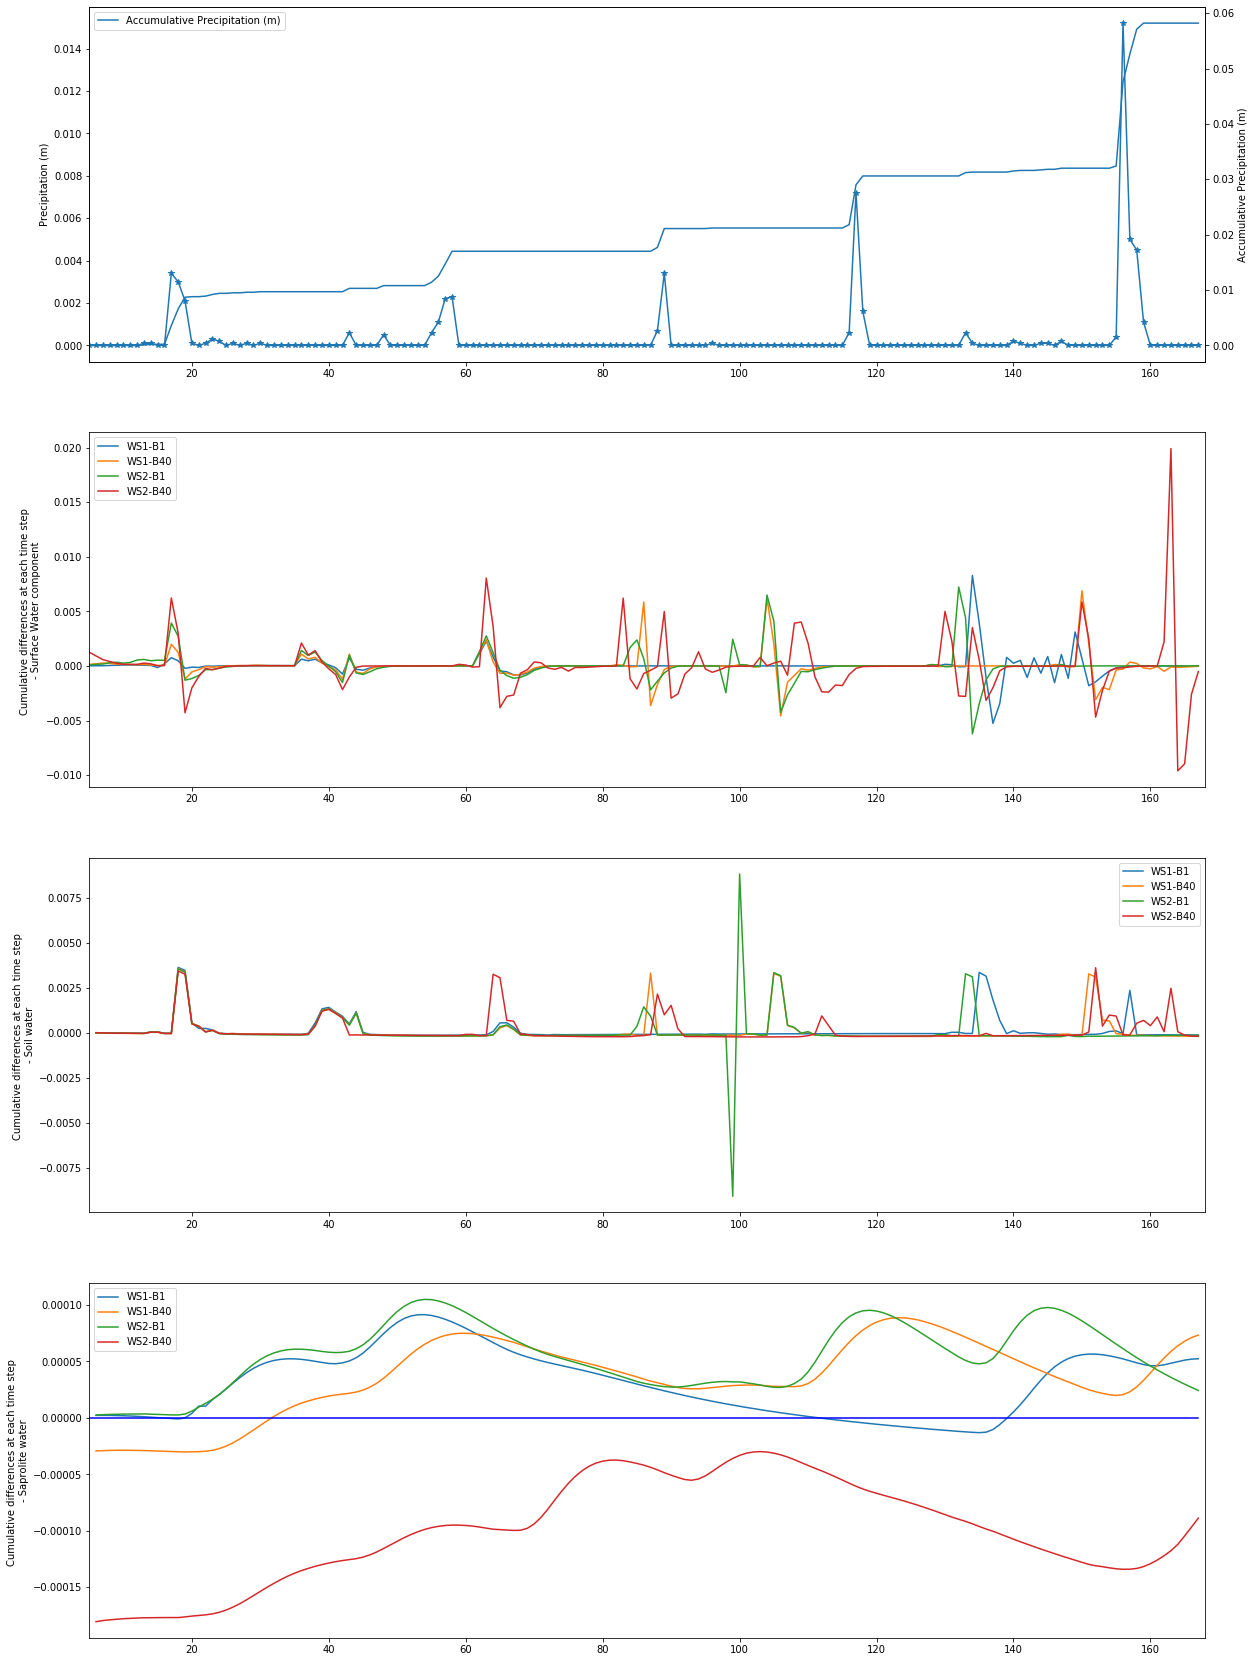

In [28]:
## plot differential changes at each time step


fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(4,1, 1)

plt.plot(precip_mmh,'*-',label='Precipitation')
plt.xlim(5,168)
plt.ylabel("Precipitation (m)")


a1x=ax.twinx()
plt.plot(precip_mmh.cumsum() ,label='Accumulative Precipitation (m)')
plt.ylabel("Accumulative Precipitation (m)")
plt.legend(loc='upper left')
plt.xlim(5,168)

aa = fig.add_subplot(4,1, 2)
plt.plot(Datum_SS_m.iloc[:,0].diff(),label='WS1-B1')
plt.plot(Datum_SS_m.iloc[:,1].diff(),label='WS1-B40')
plt.plot(Datum_SS_m.iloc[:,2].diff(),label='WS2-B1')
plt.plot(Datum_SS_m.iloc[:,3].diff(),label='WS2-B40')
plt.ylabel("Cumulative differences at each time step \n- Surface Water component")
plt.xlim(5,168)
plt.legend()

bb = fig.add_subplot(4,1,3)
plt.plot(df_soil_final.iloc[5:,0].diff(),label='WS1-B1')
plt.plot(df_soil_final.iloc[5:,1].diff(),label='WS1-B40')
plt.plot(df_soil_final.iloc[5:,2].diff(),label='WS2-B1')
plt.plot(df_soil_final.iloc[5:,3].diff(),label='WS2-B40')
plt.ylabel("Cumulative differences at each time step \n- Soil water")
plt.xlim(5,168)
plt.legend()

cc = fig.add_subplot(4,1,4)
plt.plot(df_sapro_final.iloc[5:,0].diff(),label='WS1-B1')
plt.plot(df_sapro_final.iloc[5:,1].diff(),label='WS1-B40')
plt.plot(df_sapro_final.iloc[5:,2].diff(),label='WS2-B1')
plt.plot(df_sapro_final.iloc[5:,3].diff(),label='WS2-B40')
plt.plot(df_sapro_final.iloc[5:,3]*0, color='b')
plt.ylabel("Cumulative differences at each time step \n- Saprolite water")
plt.xlim(5,168)
plt.legend()

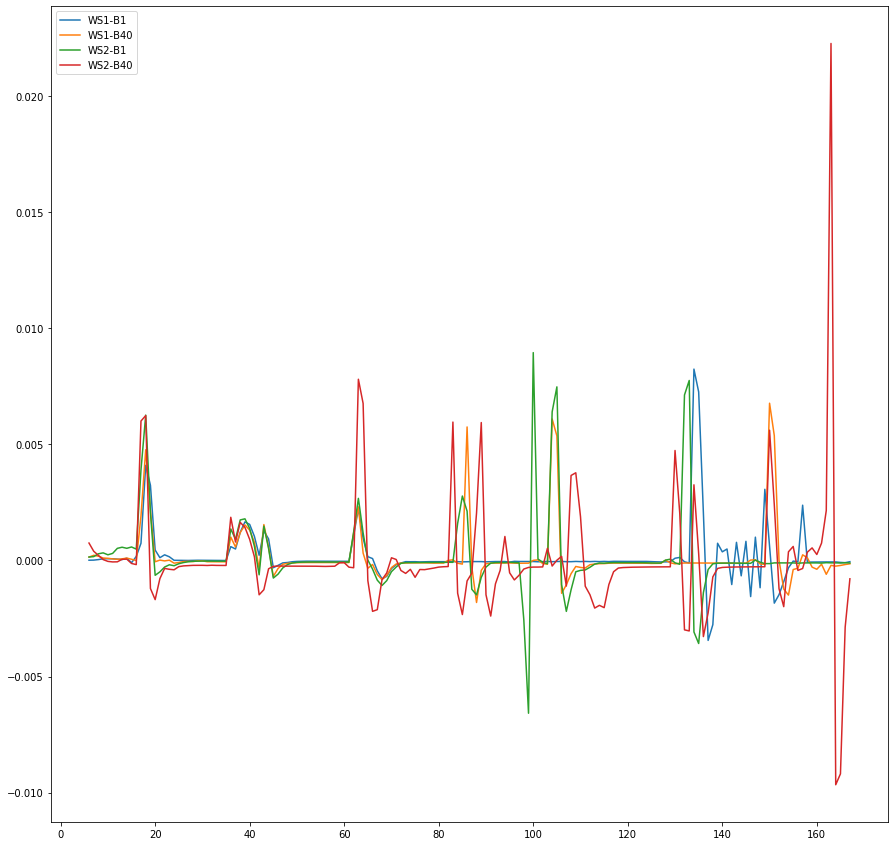

In [24]:
# sum of all the water componets, except precipitation
fig = plt.figure(figsize=(15, 15))
plt.plot(Datum_SS_m.iloc[5:,0].diff()+df_soil_final.iloc[5:,0].diff()+df_sapro_final.iloc[5:,0].diff(),label='WS1-B1')
plt.plot(Datum_SS_m.iloc[5:,1].diff()+df_soil_final.iloc[5:,1].diff()+df_sapro_final.iloc[5:,1].diff(),label='WS1-B40')
plt.plot(Datum_SS_m.iloc[5:,2].diff()+df_soil_final.iloc[5:,2].diff()+df_sapro_final.iloc[5:,2].diff(),label='WS2-B1')
plt.plot(Datum_SS_m.iloc[5:,3].diff()+df_soil_final.iloc[5:,3].diff()+df_sapro_final.iloc[5:,3].diff(),label='WS2-B40')
plt.ylabel("")
plt.legend()

In [13]:
## plot the ratio of each wate component, changing along the time
Datum_total=Datum_SS_m+df_water_total
ratio_sur=Datum_SS_m/Datum_total
ratio_soil=df_soil_final/Datum_total
ratio_sapro=df_sapro_final/Datum_total

fig = plt.figure(figsize=(10, 10))
# WS1-b1
aa = fig.add_subplot(4,1, 1)
x_array1 = np.array(ratio_sur.iloc[1:,0])
normalized_X1 = preprocessing.normalize([x_array1])
plt.plot(normalized_X1.T, label='Surface Water')

x_array2 = np.array(ratio_soil.iloc[1:,0])
normalized_X2 = preprocessing.normalize([x_array2])
plt.plot(normalized_X2.T, label='Soil Water')

x_array3 = np.array(ratio_sapro.iloc[1:,0])
normalized_X3 = preprocessing.normalize([x_array3])
plt.plot(normalized_X3.T, label='Saprolite Water')
plt.legend()

# WS1-b40
bb = fig.add_subplot(4,1, 2)
x_array1 = np.array(ratio_sur.iloc[1:,1])
normalized_X1 = preprocessing.normalize([x_array1])
plt.plot(normalized_X1.T, label='Surface Water')

x_array2 = np.array(ratio_soil.iloc[1:,1])
normalized_X2 = preprocessing.normalize([x_array2])
plt.plot(normalized_X2.T, label='Soil Water')

x_array3 = np.array(ratio_sapro.iloc[1:,1])
normalized_X3 = preprocessing.normalize([x_array3])
plt.plot(normalized_X3.T, label='Saprolite Water')
plt.legend()

# WS2-b1
cc = fig.add_subplot(4,1, 3)
x_array1 = np.array(ratio_sur.iloc[1:,2])
normalized_X1 = preprocessing.normalize([x_array1])
plt.plot(normalized_X1.T, label='Surface Water')

x_array2 = np.array(ratio_soil.iloc[1:,2])
normalized_X2 = preprocessing.normalize([x_array2])
plt.plot(normalized_X2.T, label='Soil Water')

x_array3 = np.array(ratio_sapro.iloc[1:,2])
normalized_X3 = preprocessing.normalize([x_array3])
plt.plot(normalized_X3.T, label='Saprolite Water')
plt.legend()

# WS2-b40
dd = fig.add_subplot(4,1, 4)
x_array1 = np.array(ratio_sur.iloc[1:,3])
normalized_X1 = preprocessing.normalize([x_array1])
plt.plot(normalized_X1.T, label='Surface Water')

x_array2 = np.array(ratio_soil.iloc[1:,3])
normalized_X2 = preprocessing.normalize([x_array2])
plt.plot(normalized_X2.T, label='Soil Water')

x_array3 = np.array(ratio_sapro.iloc[1:,3])
normalized_X3 = preprocessing.normalize([x_array3])
plt.plot(normalized_X3.T, label='Saprolite Water')
plt.legend()

plt.close()
# plt.bar(normalized_X, height=1, label='WS1-B1')
# plt.plot(ratio_sur.iloc[1:,1],label='WS1-B40')
# plt.plot(ratio_sur.iloc[1:,2],label='WS2-B1')
# plt.plot(ratio_sur.iloc[1:,3],label='WS2-B40')
# plt.ylabel("Surface Water component")

# # plt.plot(ratio_soil.iloc[:,0],label='soil water')
# # plt.plot(ratio_sapro.iloc[:,0],label='saprolite water')
# plt.legend()

# bb = fig.add_subplot(3,1, 2)
# plt.plot(ratio_soil.iloc[1:,0],label='WS1-B1')
# plt.plot(ratio_soil.iloc[1:,1],label='WS1-B40')
# plt.plot(ratio_soil.iloc[1:,2],label='WS2-B1')
# plt.plot(ratio_soil.iloc[1:,3],label='WS2-B40')
# plt.ylabel("Soil Water component")
# plt.legend()

# cc = fig.add_subplot(3,1, 3)
# plt.plot(ratio_sapro.iloc[1:,0],label='WS1-B1')
# plt.plot(ratio_sapro.iloc[1:,1],label='WS1-B40')
# plt.plot(ratio_sapro.iloc[1:,2],label='WS2-B1')
# plt.plot(ratio_sapro.iloc[1:,3],label='WS2-B40')
# plt.ylabel("Soil Water component")
# plt.legend()
# plt.bar(normalized_X, height=1, label='WS1-B1')
# plt.plot(ratio_sur.iloc[1:,1],label='WS1-B40')
# plt.plot(ratio_sur.iloc[1:,2],label='WS2-B1')
# plt.plot(ratio_sur.iloc[1:,3],label='WS2-B40')
# plt.ylabel("Surface Water component")

# # plt.plot(ratio_soil.iloc[:,0],label='soil water')
# # plt.plot(ratio_sapro.iloc[:,0],label='saprolite water')
# plt.legend()

# bb = fig.add_subplot(3,1, 2)
# plt.plot(ratio_soil.iloc[1:,0],label='WS1-B1')
# plt.plot(ratio_soil.iloc[1:,1],label='WS1-B40')
# plt.plot(ratio_soil.iloc[1:,2],label='WS2-B1')
# plt.plot(ratio_soil.iloc[1:,3],label='WS2-B40')
# plt.ylabel("Soil Water component")
# plt.legend()

# cc = fig.add_subplot(3,1, 3)
# plt.plot(ratio_sapro.iloc[1:,0],label='WS1-B1')
# plt.plot(ratio_sapro.iloc[1:,1],label='WS1-B40')
# plt.plot(ratio_sapro.iloc[1:,2],label='WS2-B1')
# plt.plot(ratio_sapro.iloc[1:,3],label='WS2-B40')
# plt.ylabel("Soil Water component")
# plt.legend()

NameError: name 'Datum_SS_m' is not defined

In [14]:
# Get column names first

# df=ratio_sur.copy()
# df=ratio_soil.copy()
df=ratio_sapro.copy()

names = df.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)



NameError: name 'ratio_sapro' is not defined

NameError: name 'scaled_df' is not defined

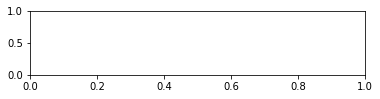

In [15]:
fig=plt.figure()


fig.add_subplot(3,1, 1)
plt.plot(scaled_df.iloc[1:,:])


In [16]:
fig.add_subplot(3,1, 2)
plt.plot(scaled_df.iloc[1:,:])

NameError: name 'scaled_df' is not defined

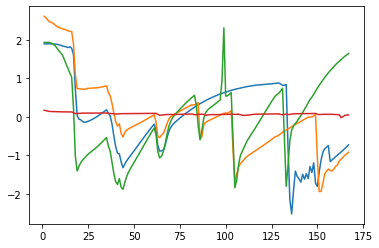

In [60]:
fig.add_subplot(3,1, 2)
plt.plot(scaled_df.iloc[1:,:])

In [25]:
print (ratio_sapro)

     pfclm1_base1  pfclm1_base40  pfclm2_base1  pfclm2_base40
0             NaN            NaN           NaN       0.000000
1        0.318700       0.967843      0.290635       0.965213
2        0.318707       0.967781      0.290636       0.964619
3        0.318716       0.967699      0.290630       0.963761
4        0.318721       0.967631      0.290607       0.962998
..            ...            ...           ...            ...
163      0.299977       0.962498      0.287566       0.950987
164      0.300263       0.962572      0.287849       0.953310
165      0.300580       0.962639      0.288127       0.955532
166      0.300915       0.962698      0.288375       0.956211
167      0.301199       0.962750      0.288628       0.956382

[168 rows x 4 columns]
